In [46]:
#initial code from here https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Grab edge list data hosted on Gist
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

In [3]:
# Preview edgelist
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [5]:
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')
nodelist.head(5)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [10]:
# Create empty graph
g = nx.Graph()
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [11]:
# Edge list example
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[2:].to_dict()) # edge attribute dict

o_gy2
y_gy2
{'trail': 'gy2', 'distance': 0.12, 'color': 'yellowgreen', 'estimate': 0}


In [13]:
# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())

In [15]:
# Node list example
print(nlrow)

id    y_rt
X      977
Y     1666
Name: 76, dtype: object


## Inspect Graph
Edges
Your graph edges are represented by a list of tuples of length 3. The first two elements are the node names linked by the edge. The third is the dictionary of edge attributes.

In [23]:
# Preview first 5 edges
list(g.edges(data=True))[0:5]

[('rs_end_north',
  'v_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.3,
    'color': 'red',
    'estimate': 0}}),
 ('v_rs',
  'b_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.21,
    'color': 'red',
    'estimate': 0}}),
 ('v_rs',
  'v_bv',
  {'attr_dict': {'trail': 'v',
    'distance': 0.52,
    'color': 'violet',
    'estimate': 0}}),
 ('v_rs',
  'v_end_east',
  {'attr_dict': {'trail': 'v',
    'distance': 0.54,
    'color': 'violet',
    'estimate': 0}}),
 ('b_rs',
  'g_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.11,
    'color': 'red',
    'estimate': 0}})]

## Nodes
Similarly, your nodes are represented by a list of tuples of length 2. The first element is the node ID, followed by the dictionary of node attributes.



In [26]:
# Preview first 10 nodes
list(g.nodes(data=True))[0:10]

[('rs_end_north', {'X': 1772, 'Y': 172}),
 ('v_rs', {'X': 1793, 'Y': 484}),
 ('b_rs', {'X': 1747, 'Y': 700}),
 ('g_rs', {'X': 1676, 'Y': 775}),
 ('w_rs', {'X': 1646, 'Y': 947}),
 ('o_rs', {'X': 1724, 'Y': 1148}),
 ('y_rs', {'X': 1805, 'Y': 1246}),
 ('rs_end_south', {'X': 1865, 'Y': 1598}),
 ('rc_end_north', {'X': 867, 'Y': 618}),
 ('v_rc', {'X': 1288, 'Y': 934})]

In [27]:
## Summary Stats
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 123
# of nodes: 77


## Visualize
Manipulate Colors and Layout
Positions: First you need to manipulate the node positions from the graph into a dictionary. This will allow you to recreate the graph using the same layout as the actual trail map. Y is negated to transform the Y-axis origin from the topleft to the bottomleft.

In [29]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'rs_end_north': (1772, -172),
 'v_rs': (1793, -484),
 'b_rs': (1747, -700),
 'g_rs': (1676, -775),
 'w_rs': (1646, -947)}

Colors: Now you manipulate the edge colors from the graph into a simple list so that you can visualize the trails by their color.

In [44]:
# Define data structure (list) of edge colors for plotting
edge_colors = [e[2]['attr_dict']['color'] for e in g.edges(data=True)]

# Preview first 10
edge_colors[0:10]

['red',
 'red',
 'violet',
 'violet',
 'red',
 'blue',
 'blue',
 'red',
 'green',
 'green']

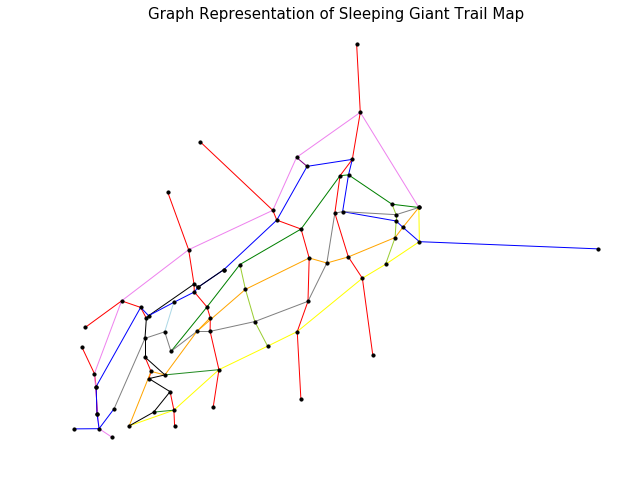

In [45]:
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()

## Solving the Chinese Postman Problem is quite simple conceptually:

1. Find all nodes with odd degree (very easy).
(Find all trail intersections where the number of trails touching that intersection is an odd number)


2. Add edges to the graph such that all nodes of odd degree are made even. These added edges must be duplicates from the original graph (we'll assume no bushwhacking for this problem). The set of edges added should sum to the minimum distance possible (hard...np-hard to be precise).
(In simpler terms, minimize the amount of double backing on a route that hits every trail)


3. Given a starting point, find the Eulerian tour over the augmented dataset (moderately easy).
(Once we know which trails we'll be double backing on, actually calculate the route from beginning to end)

## CPP Step 1: Find Nodes of Odd Degree

This is a pretty straightforward counting computation. You see that 36 of the 76 nodes have odd degree. These are mostly the dead-end trails (degree 1) and intersections of 3 trails. There are a handful of degree 5 nodes.

In [54]:
list(g.nodes(data=True))

[('rs_end_north', {'X': 1772, 'Y': 172}),
 ('v_rs', {'X': 1793, 'Y': 484}),
 ('b_rs', {'X': 1747, 'Y': 700}),
 ('g_rs', {'X': 1676, 'Y': 775}),
 ('w_rs', {'X': 1646, 'Y': 947}),
 ('o_rs', {'X': 1724, 'Y': 1148}),
 ('y_rs', {'X': 1805, 'Y': 1246}),
 ('rs_end_south', {'X': 1865, 'Y': 1598}),
 ('rc_end_north', {'X': 867, 'Y': 618}),
 ('v_rc', {'X': 1288, 'Y': 934}),
 ('b_rc', {'X': 1311, 'Y': 979}),
 ('g_rc', {'X': 1451, 'Y': 1020}),
 ('o_rc', {'X': 1498, 'Y': 1153}),
 ('w_rc', {'X': 1491, 'Y': 1352}),
 ('y_rc', {'X': 1429, 'Y': 1491}),
 ('rc_end_south', {'X': 1450, 'Y': 1800}),
 ('rt_end_north', {'X': 681, 'Y': 850}),
 ('v_rt', {'X': 802, 'Y': 1115}),
 ('tt_rt', {'X': 833, 'Y': 1273}),
 ('b_rt', {'X': 835, 'Y': 1309}),
 ('g_rt', {'X': 908, 'Y': 1378}),
 ('o_rt', {'X': 927, 'Y': 1427}),
 ('w_rt', {'X': 926, 'Y': 1490}),
 ('y_rt', {'X': 977, 'Y': 1666}),
 ('rt_end_south', {'X': 944, 'Y': 1837}),
 ('rh_end_north', {'X': 205, 'Y': 1472}),
 ('v_rh', {'X': 415, 'Y': 1350}),
 ('b_rh', {'X': 525

In [56]:
# Calculate list of nodes with odd degree
nodes_odd_degree = [v for v, d in g.degree() if d % 2 ==1]

# Preview
(nodes_odd_degree[0:5])

['rs_end_north',
 'rs_end_south',
 'rc_end_north',
 'rc_end_south',
 'rt_end_north']

In [57]:
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(g.nodes())))

Number of nodes of odd degree: 36
Number of total nodes: 77


## CPP Step 2: Find Min Distance Pairs

This is really the meat of the problem. You'll break it down into 5 parts:

1. Compute all possible pairs of odd degree nodes.
2. Compute the shortest path between each node pair calculated in 1.
3. Create a complete graph connecting every node pair in 1. with shortest path distance attributes calculated in 2.
4. Compute a minimum weight matching of the graph calculated in 3. 
(This boils down to determining how to pair the odd nodes such that the sum of the distance between the pairs is as small as possible).
5. Augment the original graph with the shortest paths between the node pairs calculated in 4.

# Step 2.1: Compute Node Pairs

You use the itertools combination function to compute all possible pairs of the odd degree nodes. Your graph is undirected, so we don't care about order: For example, (a,b) == (b,a).

In [61]:
# Compute all pairs of odd nodes. in a list of tuples
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))

# Preview pairs of odd degree nodes
odd_node_pairs[0:10]

print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 630


In [63]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [64]:
# Compute shortest paths.  Return a dictionary with node pairs keys and a single value equal to shortest path distance.
odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'distance')

# Preview with a bit of hack (there is no head/slice method for dictionaries).
dict(list(odd_node_pairs_shortest_paths.items())[0:10])

{('rs_end_north', 'rs_end_south'): 7,
 ('rs_end_north', 'rc_end_north'): 4,
 ('rs_end_north', 'rc_end_south'): 8,
 ('rs_end_north', 'rt_end_north'): 5,
 ('rs_end_north', 'o_rt'): 7,
 ('rs_end_north', 'y_rt'): 9,
 ('rs_end_north', 'rt_end_south'): 10,
 ('rs_end_north', 'rh_end_north'): 6,
 ('rs_end_north', 'rh_end_tt_1'): 7,
 ('rs_end_north', 'rh_end_tt_2'): 9}

## Step 2.3: Create Complete Graph
A complete graph is simply a graph where every node is connected to every other node by a unique edge.


create_complete_graph is defined to calculate it. The flip_weights parameter is used to transform the distance to the weight attribute where smaller numbers reflect large distances and high numbers reflect short distances. This sounds a little counter intuitive, but is necessary for Step 2.4 where you calculate the minimum weight matching on the complete graph.


Ideally you'd calculate the minimum weight matching directly, but NetworkX only implements a max_weight_matching function which maximizes, rather than minimizes edge weight. We hack this a bit by negating (multiplying by -1) the distance attribute to get weight. This ensures that order and scale by distance are preserved, but reversed.

In [67]:
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters:
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], attr_dict={'distance': v, 'weight': wt_i})
    return g

# Generate the complete graph
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)

# Counts
print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))

Number of nodes: 36
Number of edges: 630


For a visual prop, the fully connected graph of odd degree node pairs is plotted below. Note that you preserve the X, Y coordinates of each node, but the edges do not necessarily represent actual trails. For example, two nodes could be connected by a single edge in this graph, but the shortest path between them could be 5 hops through even degree nodes (not shown here).

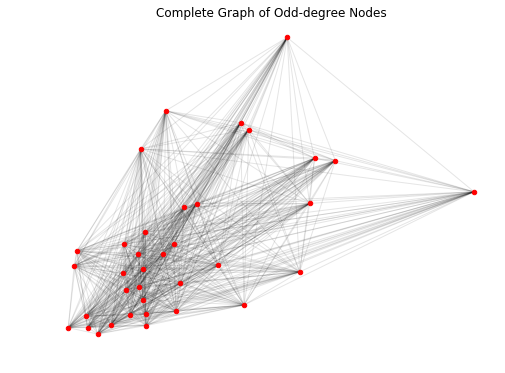

In [68]:
# Plot the complete graph of odd-degree nodes
plt.figure(figsize=(8, 6))
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.1)
plt.axis('off')
plt.title('Complete Graph of Odd-degree Nodes')
plt.show()

## Step 2.4: Compute Minimum Weight Matching
This is the most complex step in the CPP. You need to find the odd degree node pairs whose combined sum (of distance between them) is as small as possible. So for your problem, this boils down to selecting the optimal 18 edges (36 odd degree nodes / 2) from the hairball of a graph generated in 2.3.

Both the implementation and intuition of this optimization are beyond the scope of this tutorial... like 800+ lines of code and a body of academic literature beyond this scope.

The code implemented in the NetworkX function max_weight_matching is based on Galil, Zvi (1986) [2] which employs an O(n3) time algorithm.

In [69]:
# Compute min weight matching.
# Note: max_weight_matching uses the 'weight' attribute by default as the attribute to maximize.
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)

print('Number of edges in matching: {}'.format(len(odd_matching_dupes)))

Number of edges in matching: 18


The matching output (odd_matching_dupes) is a dictionary. Although there are 36 edges in this matching, you only want 18. Each edge-pair occurs twice (once with node 1 as the key and a second time with node 2 as the key of the dictionary).

In [71]:
odd_matching_dupes

{('b_bw', 'y_rh'),
 ('b_end_west', 'rh_end_south'),
 ('b_tt_3', 'rh_end_tt_4'),
 ('b_v', 'v_end_west'),
 ('g_gy1', 'y_rt'),
 ('g_w', 'rh_end_north'),
 ('nature_end_west', 'rs_end_north'),
 ('o_rt', 'g_gy2'),
 ('o_tt', 'rc_end_south'),
 ('o_w_1', 'rt_end_south'),
 ('rc_end_north', 'y_gy1'),
 ('rd_end_north', 'v_end_east'),
 ('rd_end_south', 'v_bv'),
 ('rh_end_tt_1', 'w_bw'),
 ('rh_end_tt_2', 'b_end_east'),
 ('rh_end_tt_3', 'b_bv'),
 ('rt_end_north', 'o_y_tt_end_west'),
 ('y_gy2', 'rs_end_south')}

In [79]:
list(odd_matching_dupes)

[('b_end_west', 'rh_end_south'),
 ('rh_end_tt_1', 'w_bw'),
 ('rh_end_tt_3', 'b_bv'),
 ('rd_end_south', 'v_bv'),
 ('o_tt', 'rc_end_south'),
 ('g_gy1', 'y_rt'),
 ('rt_end_north', 'o_y_tt_end_west'),
 ('b_tt_3', 'rh_end_tt_4'),
 ('nature_end_west', 'rs_end_north'),
 ('y_gy2', 'rs_end_south'),
 ('rc_end_north', 'y_gy1'),
 ('b_v', 'v_end_west'),
 ('o_w_1', 'rt_end_south'),
 ('b_bw', 'y_rh'),
 ('rh_end_tt_2', 'b_end_east'),
 ('g_w', 'rh_end_north'),
 ('rd_end_north', 'v_end_east'),
 ('o_rt', 'g_gy2')]

In [80]:
# Convert matching to list of deduped tuples
odd_matching = list(odd_matching_dupes)

# Counts
print('Number of edges in matching (deduped): {}'.format(len(odd_matching)))

Number of edges in matching (deduped): 18


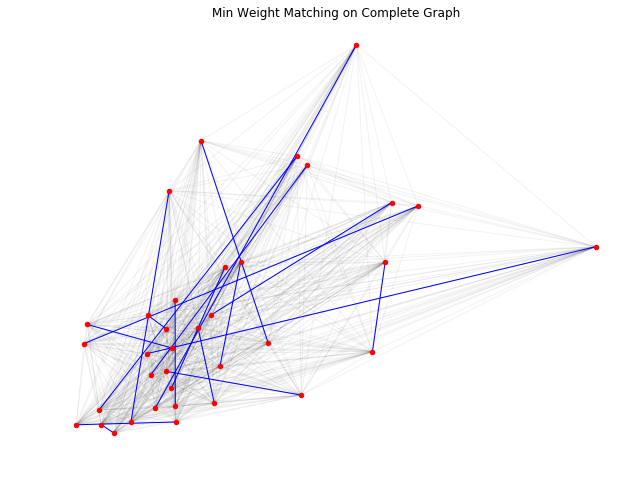

In [81]:
plt.figure(figsize=(8, 6))

# Plot the complete graph of odd-degree nodes
nx.draw(g_odd_complete, pos=node_positions, node_size=20, alpha=0.05)

# Create a new graph to overlay on g_odd_complete with just the edges from the min weight matching
g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('Min Weight Matching on Complete Graph')
plt.show()

To illustrate how this fits in with the original graph, you plot the same min weight pairs (blue lines), but over the trail map (faded) instead of the complete graph. Again, note that the blue lines are the bushwhacking route (as the crow flies edges, not actual trails). You still have a little bit of work to do to find the edges that comprise the shortest route between each pair in Step 3.

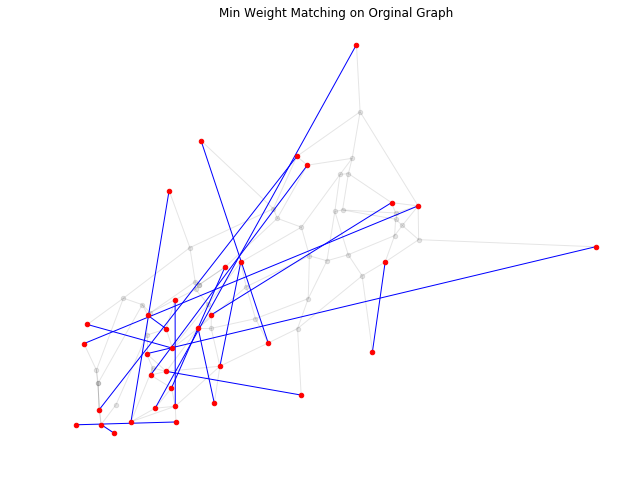

In [82]:
plt.figure(figsize=(8, 6))

# Plot the original trail map graph
nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

## Step 2.5: Augment the Original Graph

Now you augment the original graph with the edges from the matching calculated in 2.4. A simple function to do this is defined below which also notes that these new edges came from the augmented graph. You'll need to know this in 3. when you actually create the Eulerian circuit through the graph.

In [85]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """

    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0],
                           pair[1],
                           attr_dict={'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                                      'trail': 'augmented'}
                          )
    return graph_aug

In [86]:
# Create augmented graph: add the min weight matching edges to g
g_aug = add_augmenting_path_to_graph(g, odd_matching)

# Counts
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of edges in augmented graph: {}'.format(len(g_aug.edges())))

Number of edges in original graph: 123
Number of edges in augmented graph: 141


## CPP Step 3: Compute Eulerian Circuit
ow that you have a graph with even degree the hard optimization work is over. As Euler famously postulated in 1736 with the Seven Bridges of Königsberg problem, there exists a path which visits each edge exactly once if all nodes have even degree. Carl Hierholzer fomally proved this result later in the 1870s.


There are many Eulerian circuits with the same distance that can be constructed. You can get 90% of the way there with the NetworkX eulerian_circuit function. However there are some limitations.

#### Naive Circuit
Nonetheless, let's start with the simple yet incomplete solution:

In [90]:
naive_euler_circuit = list(nx.eulerian_circuit(g_aug, source='b_end_east'))
print('Length of eulerian circuit: {}'.format(len(naive_euler_circuit)))

Length of eulerian circuit: 141


In [91]:
naive_euler_circuit[0:10]


[('b_end_east', 'b_y'),
 ('b_y', 'park_east'),
 ('park_east', 'g_gy2'),
 ('g_gy2', 'w_gy2'),
 ('w_gy2', 'park_east'),
 ('park_east', 'b_o'),
 ('b_o', 'o_gy2'),
 ('o_gy2', 'y_gy2'),
 ('y_gy2', 'rs_end_south'),
 ('rs_end_south', 'y_rs')]

#### Correct Circuit
Now let's define a function that utilizes the original graph to tell you which trails to use to get from node A to node B. Although verbose in code, this logic is actually quite simple. You simply transform the naive circuit which included edges that did not exist in the original graph to a Eulerian circuit using only edges that exist in the original graph.

You loop through each edge in the naive Eulerian circuit (naive_euler_circuit). Wherever you encounter an edge that does not exist in the original graph, you replace it with the sequence of edges comprising the shortest path between its nodes using the original graph

In [97]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))

    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        #print(edge_data[0])
        if edge_data[0]['attr_dict']['trail'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att))
        else:
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))

            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))

            # If `edge` does not exist in original graph, find the shortest path between its nodes and
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))

    return euler_circuit

In [98]:
# Create the Eulerian circuit
euler_circuit = create_eulerian_circuit(g_aug, g, 'b_end_east')

Filling in edges for augmented edge: ('y_gy2', 'rs_end_south')
Augmenting path: y_gy2 => y_rs => rs_end_south
Augmenting path pairs: [('y_gy2', 'y_rs'), ('y_rs', 'rs_end_south')]

Filling in edges for augmented edge: ('y_rt', 'g_gy1')
Augmenting path: y_rt => w_rt => o_rt => g_rt => g_gy1
Augmenting path pairs: [('y_rt', 'w_rt'), ('w_rt', 'o_rt'), ('o_rt', 'g_rt'), ('g_rt', 'g_gy1')]

Filling in edges for augmented edge: ('rh_end_tt_3', 'b_bv')
Augmenting path: rh_end_tt_3 => o_tt => o_w_1 => o_gy1 => o_rc => g_rc => b_rc => b_bv
Augmenting path pairs: [('rh_end_tt_3', 'o_tt'), ('o_tt', 'o_w_1'), ('o_w_1', 'o_gy1'), ('o_gy1', 'o_rc'), ('o_rc', 'g_rc'), ('g_rc', 'b_rc'), ('b_rc', 'b_bv')]

Filling in edges for augmented edge: ('v_bv', 'rd_end_south')
Augmenting path: v_bv => v_rc => v_rt => v_rh => b_rh => b_rd => rd_end_south
Augmenting path pairs: [('v_bv', 'v_rc'), ('v_rc', 'v_rt'), ('v_rt', 'v_rh'), ('v_rh', 'b_rh'), ('b_rh', 'b_rd'), ('b_rd', 'rd_end_south')]

Filling in edges for 

In [100]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 227


In [101]:
## CPP Solution

# Preview first 20 directions of CPP solution
for i, edge in enumerate(euler_circuit[0:20]):
    print(i, edge)

0 ('b_end_east', 'b_y', {'attr_dict': {'trail': 'b', 'distance': 1.32, 'color': 'blue', 'estimate': 0}})
1 ('b_y', 'park_east', {'attr_dict': {'trail': 'y', 'distance': 0.14, 'color': 'yellow', 'estimate': 0}})
2 ('park_east', 'g_gy2', {'attr_dict': {'trail': 'g', 'distance': 0.14, 'color': 'green', 'estimate': 0}})
3 ('g_gy2', 'w_gy2', {'attr_dict': {'trail': 'gy2', 'distance': 0.05, 'color': 'yellowgreen', 'estimate': 0}})
4 ('w_gy2', 'park_east', {'attr_dict': {'trail': 'w', 'distance': 0.12, 'color': 'gray', 'estimate': 0}})
5 ('park_east', 'b_o', {'attr_dict': {'trail': 'o', 'distance': 0.11, 'color': 'orange', 'estimate': 0}})
6 ('b_o', 'o_gy2', {'attr_dict': {'trail': 'o', 'distance': 0.06, 'color': 'orange', 'estimate': 0}})
7 ('o_gy2', 'y_gy2', {'attr_dict': {'trail': 'gy2', 'distance': 0.12, 'color': 'yellowgreen', 'estimate': 0}})
8 ('y_gy2', 'y_rs', {'attr_dict': {'trail': 'y', 'distance': 0.16, 'color': 'yellow', 'estimate': 0}})
9 ('y_rs', 'rs_end_south', {'attr_dict': {'

## Stats

In [104]:
# Computing some stats
total_mileage_of_circuit = sum([edge[2]['attr_dict']['distance'] for edge in euler_circuit])
total_mileage_on_orig_trail_map = sum(nx.get_edge_attributes(g, 'distance').values())
_vcn = pd.value_counts(pd.value_counts([(e[0]) for e in euler_circuit]), sort=False)
node_visits = pd.DataFrame({'n_visits': _vcn.index, 'n_nodes': _vcn.values})
_vce = pd.value_counts(pd.value_counts([sorted(e)[0] + sorted(e)[1] for e in nx.MultiDiGraph(euler_circuit).edges()]))
edge_visits = pd.DataFrame({'n_visits': _vce.index, 'n_edges': _vce.values})

# Printing stats
print('Mileage of circuit: {0:.2f}'.format(total_mileage_of_circuit))
print('Mileage on original trail map: {0:.2f}'.format(total_mileage_on_orig_trail_map))
print('Mileage retracing edges: {0:.2f}'.format(total_mileage_of_circuit-total_mileage_on_orig_trail_map))
#print('Percent of mileage retraced: {0:.2f}%\n'.format((1-total_mileage_of_circuit/total_mileage_on_orig_trail_map)*-100))

print('Number of edges in circuit: {}'.format(len(euler_circuit)))
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of nodes in original graph: {}\n'.format(len(g.nodes())))

print('Number of edges traversed more than once: {}\n'.format(len(euler_circuit)-len(g.edges())))  

print('Number of times visiting each node:')
print(node_visits.to_string(index=False))

print('\nNumber of times visiting each edge:')
print(edge_visits.to_string(index=False))

Mileage of circuit: 50.93
Mileage on original trail map: 0.00
Mileage retracing edges: 50.93
Number of edges in circuit: 227
Number of edges in original graph: 123
Number of nodes in original graph: 77

Number of edges traversed more than once: 104

Number of times visiting each node:
n_visits  n_nodes
       1       17
       2       22
       3       11
       4       10
       5       11
       6        4
       7        2

Number of times visiting each edge:
n_visits  n_edges
       1       56
       2       42
       3       14
       4       10
       5        1


## Create CPP Graph
Your first step is to convert the list of edges to walk in the Euler circuit into an edge list with plot-friendly attributes.



In [105]:
def create_cpp_edgelist(euler_circuit):
    """
    Create the edgelist without parallel edge for the visualization
    Combine duplicate edges and keep track of their sequence and # of walks
    Parameters:
        euler_circuit: list[tuple] from create_eulerian_circuit
    """
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1

        else:
            cpp_edgelist[edge] = e
            cpp_edgelist[edge][2]['sequence'] = str(i)
            cpp_edgelist[edge][2]['visits'] = 1

    return list(cpp_edgelist.values())

In [106]:
cpp_edgelist = create_cpp_edgelist(euler_circuit)
print('Number of edges in CPP edge list: {}'.format(len(cpp_edgelist)))


Number of edges in CPP edge list: 123


In [107]:
cpp_edgelist[0:3]


[('b_end_east',
  'b_y',
  {'attr_dict': {'trail': 'b',
    'distance': 1.32,
    'color': 'blue',
    'estimate': 0},
   'sequence': '0, 226',
   'visits': 2}),
 ('b_y',
  'park_east',
  {'attr_dict': {'trail': 'y',
    'distance': 0.14,
    'color': 'yellow',
    'estimate': 0},
   'sequence': '1',
   'visits': 1}),
 ('park_east',
  'g_gy2',
  {'attr_dict': {'trail': 'g',
    'distance': 0.14,
    'color': 'green',
    'estimate': 0},
   'sequence': '2',
   'visits': 1})]

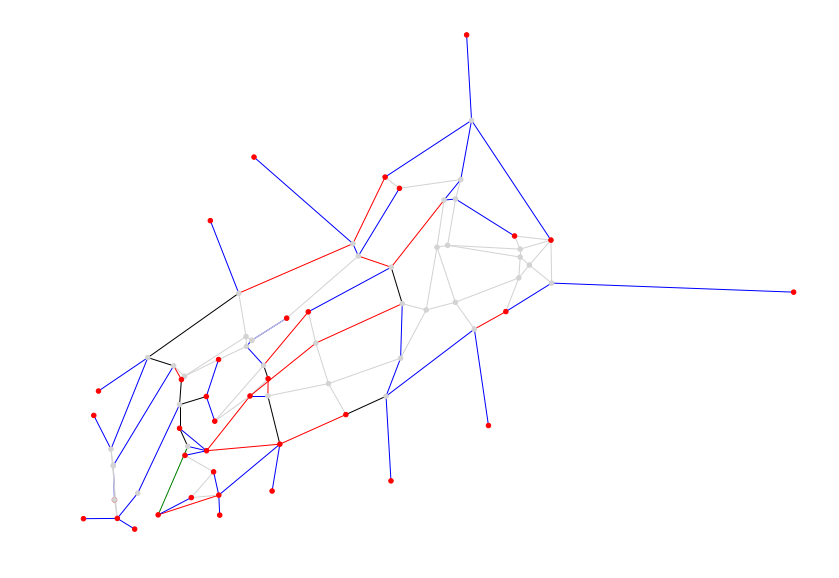

In [124]:
g_cpp = nx.Graph(cpp_edgelist)

plt.figure(figsize=(14, 10))

visit_colors = {1:'lightgray', 2:'blue', 3: 'red', 4 : 'black', 5 : 'green'}
edge_colors = [visit_colors[e[2]['visits']] for e in g_cpp.edges(data=True)]
node_colors = ['red'  if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

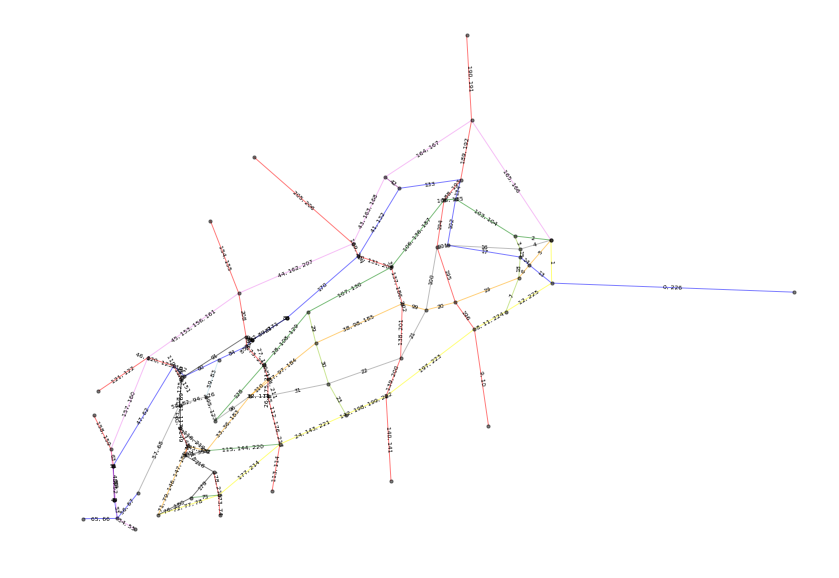

In [127]:
plt.figure(figsize=(14, 10))

edge_colors = [e[2]['attr_dict']['color'] for e in g_cpp.edges(data=True)]
nx.draw_networkx(g_cpp, pos=node_positions, node_size=10, node_color='black', edge_color=edge_colors, with_labels=False, alpha=0.5)

bbox = {'ec':[1,1,1,0], 'fc':[1,1,1,0]}  # hack to label edges over line (rather than breaking up line)
edge_labels = nx.get_edge_attributes(g_cpp, 'sequence')
nx.draw_networkx_edge_labels(g_cpp, pos=node_positions, edge_labels=edge_labels, bbox=bbox, font_size=6)

plt.axis('off')
plt.show()

In [137]:
visit_colors = {1:'lightgray', 2:'blue', 3: 'red', 4 : 'black', 5 : 'green'}
edge_cnter = {}
g_i_edge_colors = []
for i, e in enumerate(euler_circuit, start=1):

    edge = frozenset([e[0], e[1]])
    if edge in edge_cnter:
        edge_cnter[edge] += 1
    else:
        edge_cnter[edge] = 1

    # Full graph (faded in background)
    nx.draw_networkx(g_cpp, pos=node_positions, node_size=6, node_color='gray', with_labels=False, alpha=0.07)

    # Edges walked as of iteration i
    euler_circuit_i = copy.deepcopy(euler_circuit[0:i])
    for i in range(len(euler_circuit_i)):
        edge_i = frozenset([euler_circuit_i[i][0], euler_circuit_i[i][1]])
        euler_circuit_i[i][2]['visits_i'] = edge_cnter[edge_i]
    g_i = nx.Graph(euler_circuit_i)
    g_i_edge_colors = [visit_colors[e[2]['visits_i']] for e in g_i.edges(data=True)]

    nx.draw_networkx_nodes(g_i, pos=node_positions, node_size=6, alpha=0.6, node_color='lightgray', with_labels=False, linewidths=0.1)
    nx.draw_networkx_edges(g_i, pos=node_positions, edge_color=g_i_edge_colors, alpha=0.8)

    plt.axis('off')
    plt.savefig('img{}.png'.format(i), dpi=120, bbox_inches='tight')
    plt.close()

In [140]:
import glob
import numpy as np
import imageio
import os

def make_circuit_video(image_path, movie_filename, fps=7):
    # sorting filenames in order
    filenames = glob.glob(image_path + 'img*.png')
    filenames_sort_indices = np.argsort([int(os.path.basename(filename).split('.')[0][3:]) for filename in filenames])
    filenames = [filenames[i] for i in filenames_sort_indices]

    # make movie
    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

make_circuit_video('', 'cpp_route_animation.gif', fps=3)